In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from snvmodels.snv import SNv
from snvmodels.solarndists import SolarNDist
from detectors.nai import DAMA
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model = SNv()

In [3]:
## Supernova neutrino flux
Ev = np.logspace(1,6,100) # Supernova neutrino energy, units of keV
flux_electron_nu = Model.Flux_neutrino( Ev, 'e')
flux_electron_antinu = Model.Flux_neutrino( Ev, 'ea')
flux_x = Model.Flux_neutrino( Ev, 'x')
flux_total = flux_electron_nu + flux_electron_antinu + flux_x

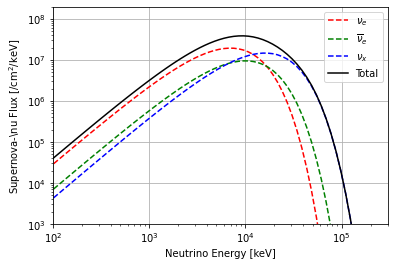

In [4]:
## Supernova neutrino flux
plt.plot(Ev, flux_electron_nu, label=r'$\nu_{e}$', color = 'r', linestyle='--')
plt.plot(Ev, flux_electron_antinu, label=r'$\overline{\nu}_e$', color = 'g', linestyle ='--')
plt.plot(Ev, flux_x, label=r'$\nu_x$', color = 'b', linestyle='--')
plt.plot(Ev, flux_total, label=r'Total', color = 'k', linestyle='-')
#plt.plot(E,[Det.dRdE(DMRate,e) for e in E])
#plt.plot(E,[Det.dRdE(DMRate2,e) for e in E])
plt.legend()
plt.xlabel(r"Neutrino Energy [keV]")
plt.ylabel(r"Supernova-\nu Flux [/cm$^2$/keV]")
plt.xlim(1e2,3e5)
plt.ylim(1e3, 2e8)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

Text(0, 0.5, 'Counts [/kg/keV]')

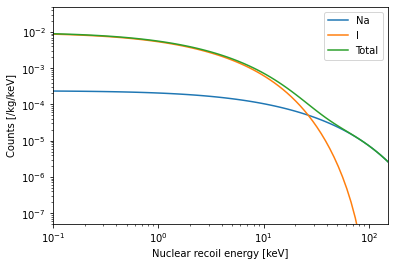

In [5]:
ER = np.logspace(-1,3,100) # Nuclear recoil energy, units of keV
T=Det.Nuclei()
plt.plot(ER,[Model.dRdER(T[0],Ev,ERi) for ERi in ER],label='Na')
plt.plot(ER,[Model.dRdER(T[1],Ev,ERi) for ERi in ER],label='I')
plt.plot(ER,[Model.dRdER(T[0],Ev,ERi)+Model.dRdER(T[1],Ev,ERi) for ERi in ER],label='Total')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e-1,1.5e2)
plt.ylim(5e-8, 5e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [/kg/keV]")

/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))
/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))
/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))
/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))


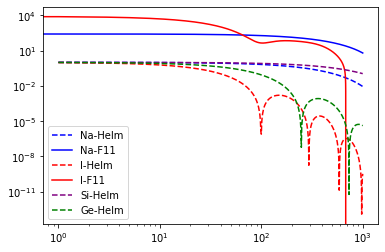

In [6]:
from targets.i import I
from targets.na import Na
from targets.si import Si
from targets.ge import Ge
ER = np.linspace(0,1000,1000)
plt.plot(ER, Na().Helm(ER*1e3)*Na().Helm(ER*1e3),label='Na-Helm',color = 'b', linestyle='--')
plt.plot(ER, Na().F11(ER*1e3,1/np.sqrt(2),1/np.sqrt(2)),label='Na-F11',color = 'b', linestyle='-')
plt.plot(ER, I().Helm(ER*1e3)*I().Helm(ER*1e3),label='I-Helm',color = 'r', linestyle='--')
plt.plot(ER, I().F11(ER*1e3,1/np.sqrt(2),1/np.sqrt(2)),label='I-F11',color = 'r', linestyle='-')
plt.plot(ER, Si().Helm(ER*1e3)*Si().Helm(ER*1e3),label='Si-Helm',color = 'purple', linestyle='--')
plt.plot(ER, Ge().Helm(ER*1e3)*Ge().Helm(ER*1e3),label='Ge-Helm',color = 'green', linestyle='--')
#plt.plot(ER, Si().F11(ER*1e3,1/np.sqrt(2),1/np.sqrt(2)),label='Si-F11',color = 'purple', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.legend()

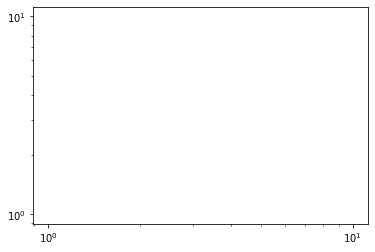

In [7]:
## With DAMA detector response, need to be fixed
ER = np.logspace(-1,3,100) # Nuclear recoil energy, units of keV
def DMRate(T,ER):
    ## DM rate defined with SHM
    return Model.dRdER(T,Ev,ER)
## Supernova neutrino flux
#ER = np.logspace(-2,2,100) # observed energy, units of keV_ee
#plt.plot(ER,[Det.dRdE(DMRate,ERi) for ERi in ER])
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e-1,1.5e2)
#plt.ylim(5e-8, 5e-2)

/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_93274/640440618.py:17: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(1442/1e3,0.01401e10,'y',label='pep', markerfmt=' ',basefmt=" ")


Text(0, 0.5, 'Flux [MeV$^{-1}$cm$^{-2}$s$^{-1}$]')

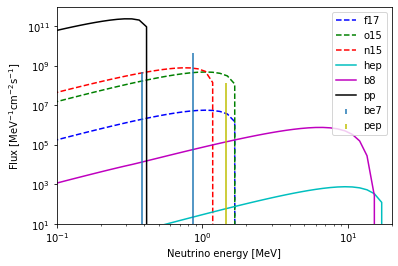

In [18]:
Ev = np.logspace(1,6,100) # Supernova neutrino energy, units of keV
f17NDist = SolarNDist("f17",0.0005912e10)
o15NDist = SolarNDist("o15",0.05031e10)
n13NDist = SolarNDist("n13",0.05712e10)
hepNDist = SolarNDist("hepspectrum",0.000000788e10)
b8NDist = SolarNDist("b8spectrum",0.0005822e10)
be7_384NDist = SolarNDist("be7_384",0.4857e10)
be7_861NDist = SolarNDist("be7_861",0.4857e10)
ppNDist = SolarNDist("pp",5.938e10)

plt.plot(Ev/1e3,f17NDist.dist(Ev/1e3),label='f17',linestyle='--',color='b')
plt.plot(Ev/1e3,o15NDist.dist(Ev/1e3),label='o15',linestyle='--',color='g')
plt.plot(Ev/1e3,n13NDist.dist(Ev/1e3),label='n15',linestyle='--',color='r')
plt.plot(Ev/1e3,hepNDist.dist(Ev/1e3),label='hep',color='c')
plt.plot(Ev/1e3,b8NDist.dist(Ev/1e3),label='b8',color='m')
plt.stem([384.3/1e3,861.8/1e3],np.array([0.103,0.897])*0.4857e10,label='be7',markerfmt=' ',basefmt=" ")
plt.stem(1442/1e3,0.01401e10,'y',label='pep', markerfmt=' ',basefmt=" ")
plt.plot(Ev/1e3,ppNDist.dist(Ev/1e3),label='pp',color='k')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e-1,20)
plt.ylim(10, 1e12)
plt.xlabel(r"Neutrino energy [MeV]")
plt.ylabel(r"Flux [MeV$^{-1}$cm$^{-2}$s$^{-1}$]")

/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_93274/2267154681.py:26: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(1442,0.01401e10*24*3600,'y',label='pep', markerfmt=' ',basefmt=" ")


Text(0, 0.5, 'Flux [MeV$^{-1}$cm$^{-2}$d$^{-1}$]')

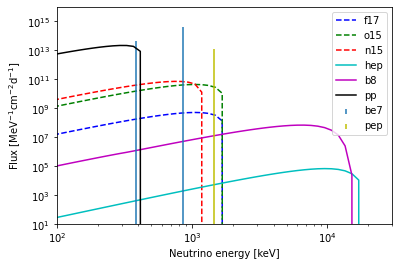

In [25]:
Ev = np.logspace(1,6,100) # Supernova neutrino energy, units of keV
f17NDist = SolarNDist("f17",0.0005912e10)
o15NDist = SolarNDist("o15",0.05031e10)
n13NDist = SolarNDist("n13",0.05712e10)
hepNDist = SolarNDist("hepspectrum",0.000000788e10)
b8NDist = SolarNDist("b8spectrum",0.0005822e10)
be7_384NDist = SolarNDist("be7_384",0.4857e10)
be7_861NDist = SolarNDist("be7_861",0.4857e10)
ppNDist = SolarNDist("pp",5.938e10)

f17flux=f17NDist.dist(Ev/1e3)/1e3*24*3600
o15flux=o15NDist.dist(Ev/1e3)/1e3*24*3600
n13flux=n13NDist.dist(Ev/1e3)/1e3*24*3600
hepflux=hepNDist.dist(Ev/1e3)/1e3*24*3600
b8flux=b8NDist.dist(Ev/1e3)/1e3*24*3600
ppflux=ppNDist.dist(Ev/1e3)/1e3*24*3600

total_continuous_flux=f17flux+o15flux+n13flux+hepflux+b8flux+ppflux

plt.plot(Ev,f17flux,label='f17',linestyle='--',color='b')
plt.plot(Ev,o15flux,label='o15',linestyle='--',color='g')
plt.plot(Ev,n13flux,label='n15',linestyle='--',color='r')
plt.plot(Ev,hepflux,label='hep',color='c')
plt.plot(Ev,b8flux,label='b8',color='m')
plt.stem([384.3,861.8],np.array([0.103,0.897])*0.4857e10*24*3600,label='be7',markerfmt=' ',basefmt=" ")
plt.stem(1442,0.01401e10*24*3600,'y',label='pep', markerfmt=' ',basefmt=" ")
plt.plot(Ev,ppflux,label='pp',color='k')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e2,3e4)
plt.ylim(10, 1e16)
plt.xlabel(r"Neutrino energy [keV]")
plt.ylabel(r"Flux [MeV$^{-1}$cm$^{-2}$d$^{-1}$]")